In [682]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns

# warnings.filterwarnings('ignore')
# InteractiveShell.ast_node_interactivity = "all"

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)
# pd.options.display.max_rows

## 1. Load data

In [683]:
chotot_df = pd.read_csv("chotot_cleaned.csv")

/home/hoan/Python/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,8,13,16,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [684]:
alonhadat_df = pd.read_csv("alonhadat.csv")

In [685]:
chotot_df.drop(labels= ['address', 'type_real_estate'], axis=1, inplace=True)
chotot_df.rename(columns={'ahl_type': 'type_real_estate'}, inplace=True)
chotot_df['website'] = 'Chotot'
chotot_df['front_road'] = np.nan
chotot_df.head(3)

,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,apartment_feature,rooms,toilets,floors,living_size (m2),width (m),length (m),property_road_condition,land_feature,property_back_condition,price (million),type_real_estate,website,front_road
0,05/11/2021,Phường Tam Hòa,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,NaN,NaN,Đang chờ sổ,70.0,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,Chung cư,Chotot,NaN
1,05/11/2021,Phường Thống Nhất,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,Bắc,Nam,Đã có sổ,48.0,NaN,Nội thất đầy đủ,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1550.0,Chung cư,Chotot,NaN
2,05/11/2021,Phường Hố Nai,Thành phố Biên Hòa,Đồng Nai,Chưa bàn giao,NaN,NaN,Giấy tờ khác,67.0,NaN,Hoàn thiện cơ bản,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,Chung cư,Chotot,NaN


In [686]:
alonhadat_df['website'] = 'alonhadat'
alonhadat_df.head(3)

,city,date,direction,district,floors,front_road,length,price (million),property_legal_document,rooms,size,type_real_estate,ward,width,website
0,Bình Dương,08/11/2021,NaN,Thành phố Thủ Dầu Một,2.0,12.0,12.0,3200.0,NaN,3.0,120.0,Nhà mặt tiền,Phường Hiệp An,6.0,alonhadat
1,Bình Dương,08/11/2021,NaN,Thành phố Thuận An,NaN,10.0,70.0,32000.0,Sổ hồng/ Sổ đỏ,NaN,900.0,Nhà mặt tiền,Phường An Phú,17.0,alonhadat
2,Bình Dương,08/11/2021,NaN,Thành phố Dĩ An,1.0,4.0,12.0,2550.0,Sổ hồng/ Sổ đỏ,3.0,60.0,Nhà trong hẻm,Phường Đông Hòa,5.0,alonhadat


In [687]:
alonhadat_df['price (million)'] = alonhadat_df['price (million)'].apply(lambda x: np.nan if x == 'Thỏa thuận' else x)

In [688]:
alonhadat_df['price (million)'] = alonhadat_df['price (million)'].apply(lambda x: float(x))

## 2. Merge Data

In [689]:
chotot_cols = set(chotot_df.columns)
alo_cols = set(alonhadat_df.columns)
alo_cols.difference(chotot_cols)

{'city', 'date', 'district', 'length', 'size', 'width'}

In [690]:
alonhadat_df.columns

Index(['city', 'date', 'direction', 'district', 'floors', 'front_road',
       'length', 'price (million)', 'property_legal_document', 'rooms', 'size',
       'type_real_estate', 'ward', 'width', 'website'],
      dtype='object')

In [691]:
alo_cols = ['region', 'list_time', 'direction', 'area', 'floors', 'front_road',
            'length (m)', 'price (million)', 'property_legal_document', 'rooms', 'size (m2)',
            'type_real_estate', 'ward', 'width (m)', 'website']

In [692]:
chotot_cols = set(chotot_df.columns)
set(alo_cols).difference(chotot_cols)

set()

In [693]:
alonhadat_df.columns = alo_cols # doi tem thuoc tinh trung voi chotot

In [694]:
alonhadat_df.head(3)

,region,list_time,direction,area,floors,front_road,length (m),price (million),property_legal_document,rooms,size (m2),type_real_estate,ward,width (m),website
0,Bình Dương,08/11/2021,NaN,Thành phố Thủ Dầu Một,2.0,12.0,12.0,3200.0,NaN,3.0,120.0,Nhà mặt tiền,Phường Hiệp An,6.0,alonhadat
1,Bình Dương,08/11/2021,NaN,Thành phố Thuận An,NaN,10.0,70.0,32000.0,Sổ hồng/ Sổ đỏ,NaN,900.0,Nhà mặt tiền,Phường An Phú,17.0,alonhadat
2,Bình Dương,08/11/2021,NaN,Thành phố Dĩ An,1.0,4.0,12.0,2550.0,Sổ hồng/ Sổ đỏ,3.0,60.0,Nhà trong hẻm,Phường Đông Hòa,5.0,alonhadat


In [695]:
BDS_df = chotot_df.copy()
# merge 2 data lai thanh BDS_df
BDS_df = BDS_df.append(alonhadat_df, ignore_index=True)

In [696]:
BDS_df['floors'] = BDS_df['floors'].apply(lambda x: int(x) if str(x) == 'float' else x)

## 3. EDA

### 3.0 Repreprocessing

In [697]:
BDS_df

,list_time,ward,area,region,property_status,direction,balconydirection,property_legal_document,size (m2),floornumber,furnishing_sell,apartment_feature,rooms,toilets,floors,living_size (m2),width (m),length (m),property_road_condition,land_feature,property_back_condition,price (million),type_real_estate,website,front_road
0,05/11/2021,Phường Tam Hòa,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,NaN,NaN,Đang chờ sổ,70.0,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1150.0,Chung cư,Chotot,NaN
1,05/11/2021,Phường Thống Nhất,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,Bắc,Nam,Đã có sổ,48.0,NaN,Nội thất đầy đủ,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1550.0,Chung cư,Chotot,NaN
2,05/11/2021,Phường Hố Nai,Thành phố Biên Hòa,Đồng Nai,Chưa bàn giao,NaN,NaN,Giấy tờ khác,67.0,NaN,Hoàn thiện cơ bản,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,Chung cư,Chotot,NaN
3,05/11/2021,Phường Hố Nai,Thành phố Biên Hòa,Đồng Nai,Chưa bàn giao,NaN,NaN,Đã có sổ,70.0,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0,Chung cư,Chotot,NaN
4,05/11/2021,Phường Thống Nhất,Thành phố Biên Hòa,Đồng Nai,Đã bàn giao,NaN,NaN,Đã có sổ,48.0,NaN,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Chung cư,Chotot,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220898,08/11/2021,Xã Nhuận Đức,Huyện Củ Chi,Hồ Chí Minh,NaN,NaN,NaN,NaN,1809.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,60.0,NaN,NaN,NaN,3200.0,"Đất thổ cư, đất ở",alonhadat,25.0
220899,08/11/2021,Phường Hiệp Bình Phước,Thành phố Thủ Đức,Hồ Chí Minh,NaN,NaN,NaN,NaN,68.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,6.0,11.0,NaN,NaN,NaN,5000.0,Nhà mặt tiền,alonhadat,7.0
220900,08/11/2021,Thị Trấn Củ Chi,Huyện Củ Chi,Hồ Chí Minh,NaN,NaN,NaN,Sổ hồng/ Sổ đỏ,3217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,100.0,NaN,NaN,NaN,5700.0,"Đất thổ cư, đất ở",alonhadat,12.0
220901,08/11/2021,Xã Nhuận Đức,Huyện Củ Chi,Hồ Chí Minh,NaN,NaN,NaN,Sổ hồng/ Sổ đỏ,2273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,48.0,NaN,NaN,NaN,5400.0,"Đất thổ cư, đất ở",alonhadat,12.0


In [698]:
def convert_int(x):
    if str(x) == 'nan':
        return x
    else:
        try:
            return int(x)
        except:
            x

In [699]:
for col in ['width (m)', 'length (m)']:
    BDS_df[col] = BDS_df[col].apply(convert_int)

In [700]:
BDS_df['rooms'] = BDS_df['rooms'].apply(lambda x: str(x).replace('.', ''))

In [701]:
BDS_df['floornumber'] = BDS_df['floornumber'].apply(lambda x: str(x).replace('.', ''))

In [702]:
BDS_df['floors'] = BDS_df['floors'].apply(lambda x: str(x).replace('.', ''))

In [703]:
BDS_df['region'] = BDS_df['region'].apply(lambda x: 'Tp Hồ Chí Minh' if x == 'Hồ Chí Minh' else x)

In [704]:
def convert_float(x):
    if str(x) == 'nan':
        return x
    else:
        try:
            return float(x)
        except:
            np.nan

In [705]:
BDS_df['front_road'] = BDS_df['front_road'].apply(lambda x: convert_float(x))

In [711]:
BDS_df.to_csv('BDS.csv')

### 3.1 Overview

In [706]:
BDS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220903 entries, 0 to 220902
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   list_time                220903 non-null  object 
 1   ward                     220805 non-null  object 
 2   area                     220901 non-null  object 
 3   region                   220903 non-null  object 
 4   property_status          13038 non-null   object 
 5   direction                55567 non-null   object 
 6   balconydirection         4305 non-null    object 
 7   property_legal_document  175354 non-null  object 
 8   size (m2)                220743 non-null  float64
 9   floornumber              220903 non-null  object 
 10  furnishing_sell          26166 non-null   object 
 11  apartment_feature        2881 non-null    object 
 12  rooms                    220903 non-null  object 
 13  toilets                  65152 non-null   object 
 14  floo

In [707]:
len(BDS_df[BDS_df['price (million)'] < 50000]) / len(BDS_df) ## nho hon 30 ty

0.9512319887009231

count    2.208630e+05
mean     7.903109e+06
std      3.707341e+09
min      3.700000e-01
25%      2.750000e+03
50%      5.300000e+03
75%      1.100000e+04
max      1.742304e+12
Name: price (million), dtype: float64


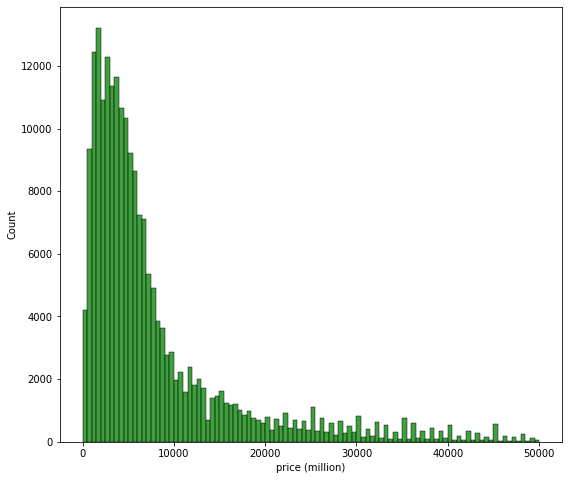

In [708]:
print(BDS_df['price (million)'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(BDS_df[BDS_df['price (million)'] < 50000]['price (million)'], color='g', bins=100);

### 3.2 Numeric variables

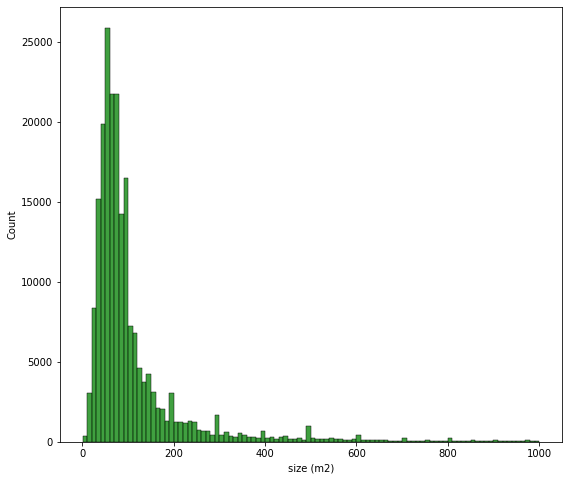

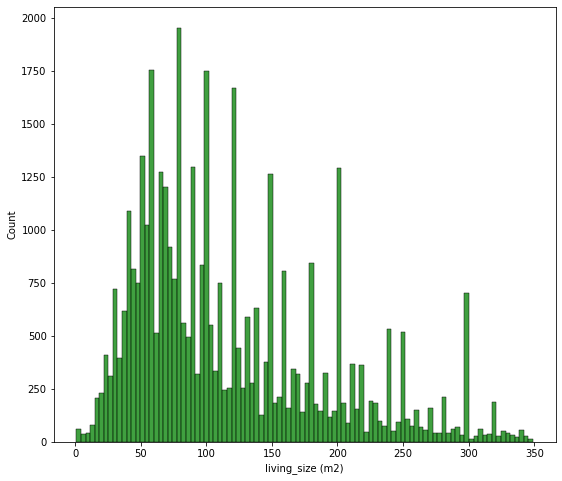

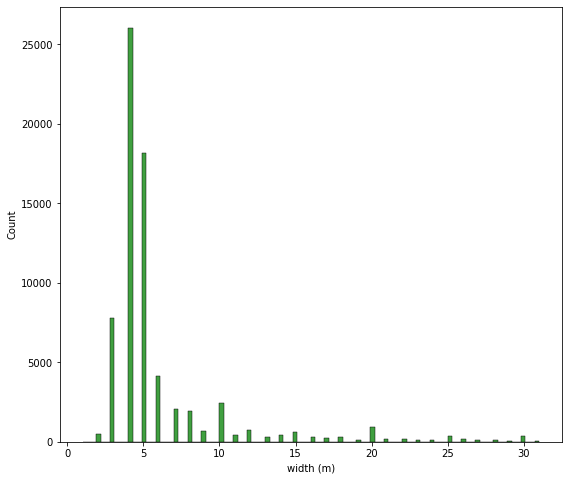

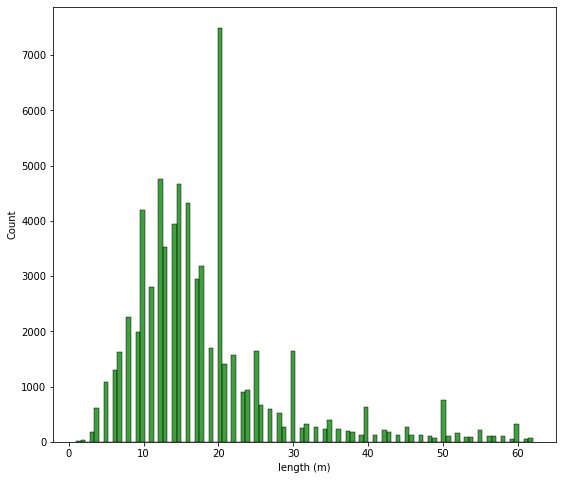

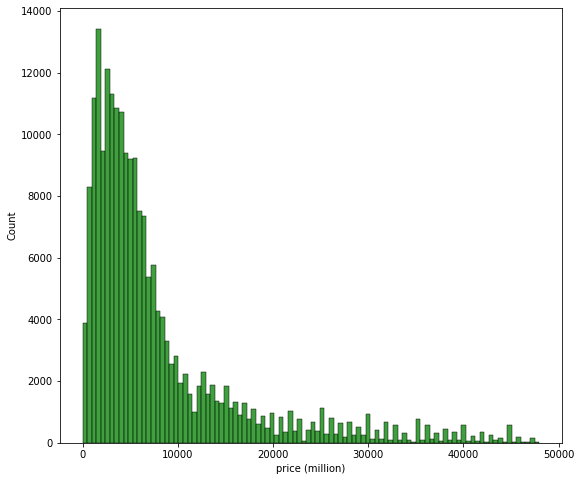

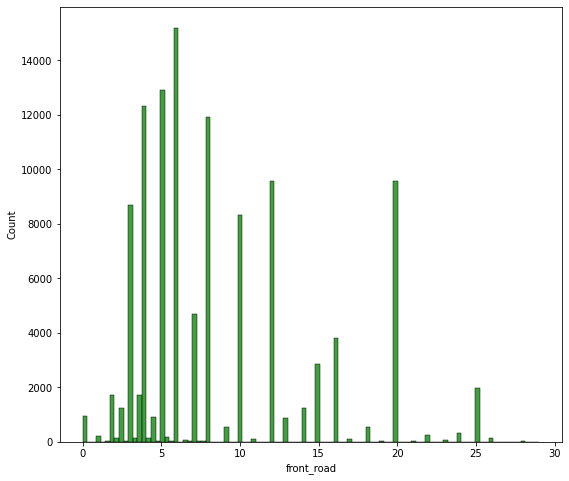

In [709]:
for col in BDS_df.columns:
    if BDS_df[col].dtypes == 'float':
        quant = BDS_df[col].quantile(0.95)
        plt.figure(figsize=(9, 8))
        sns.histplot(BDS_df[BDS_df[col] < quant][col], color='g', bins=100);

### 3.3 Categorical variables

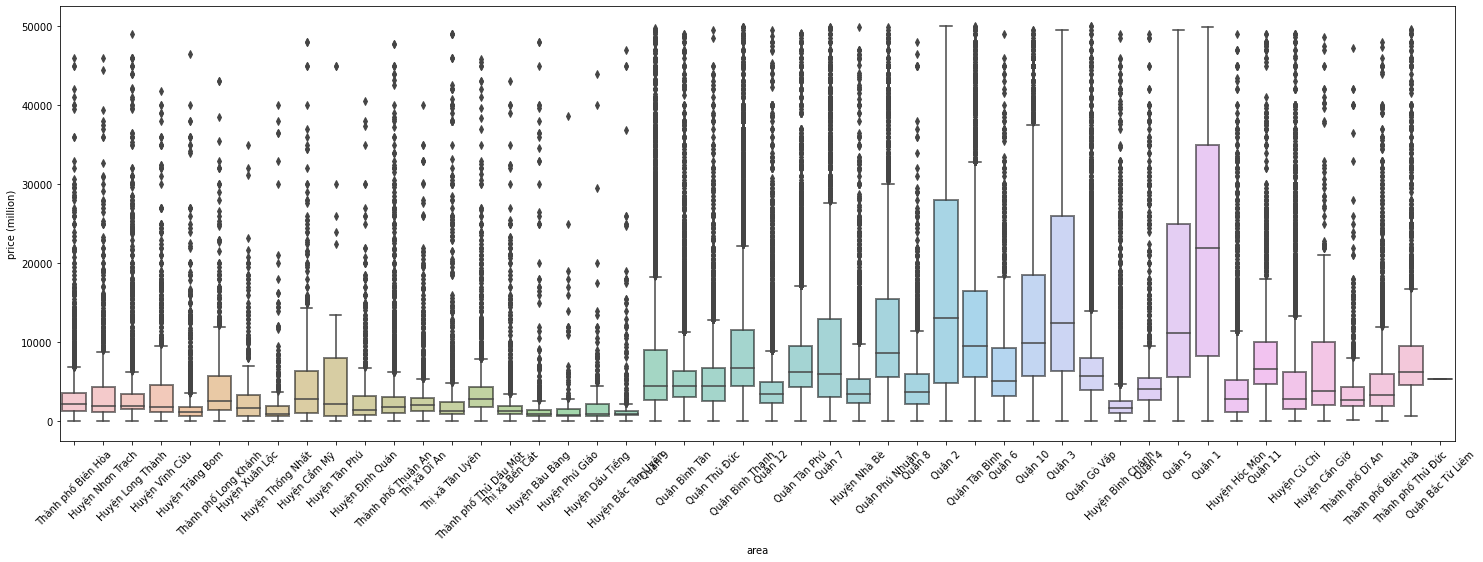

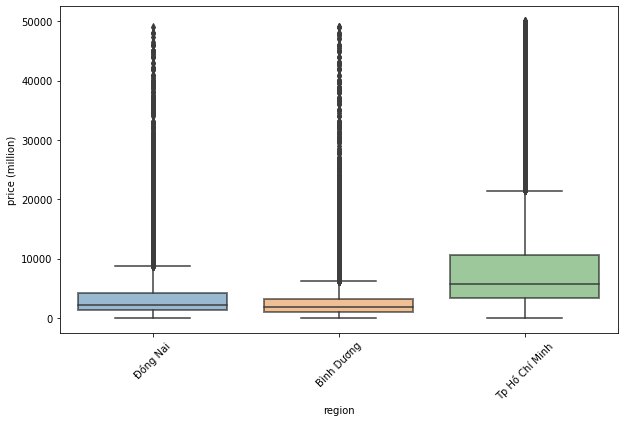

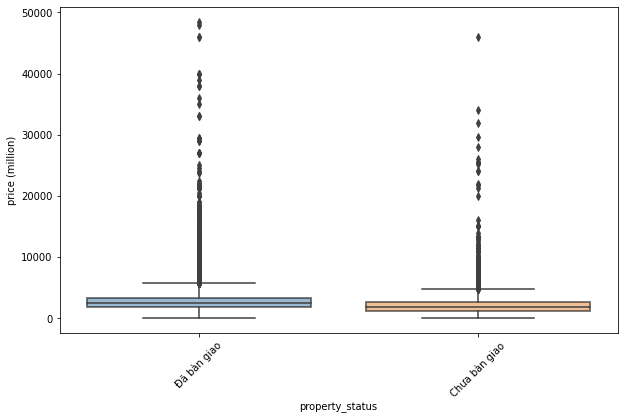

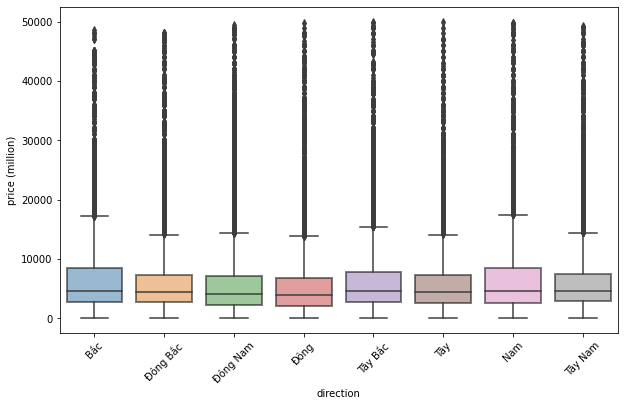

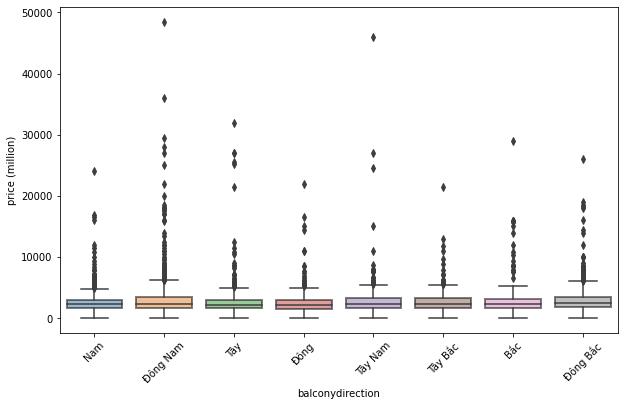

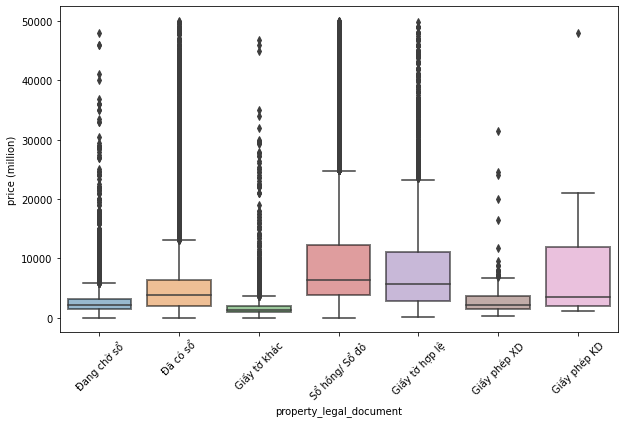

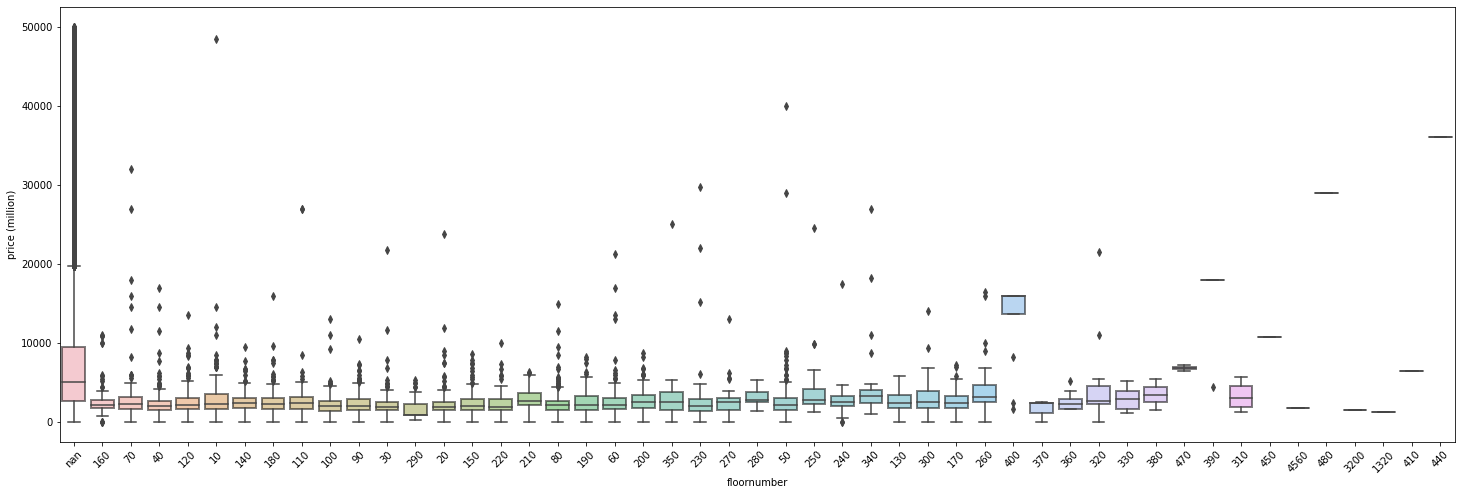

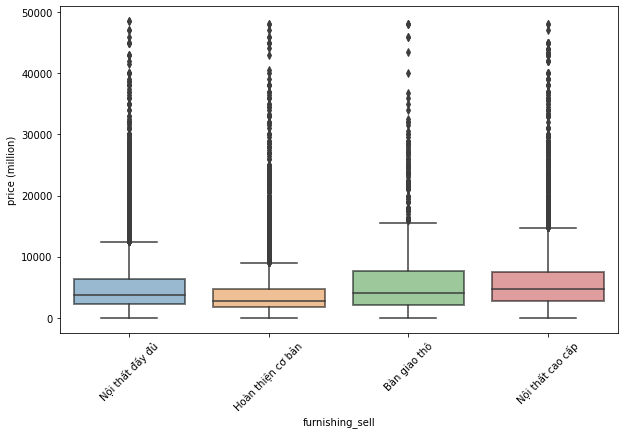

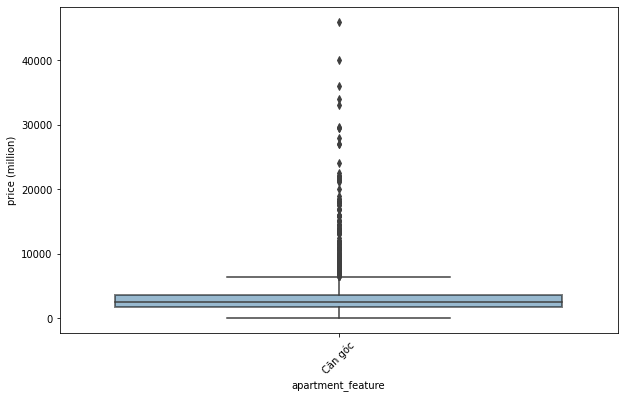

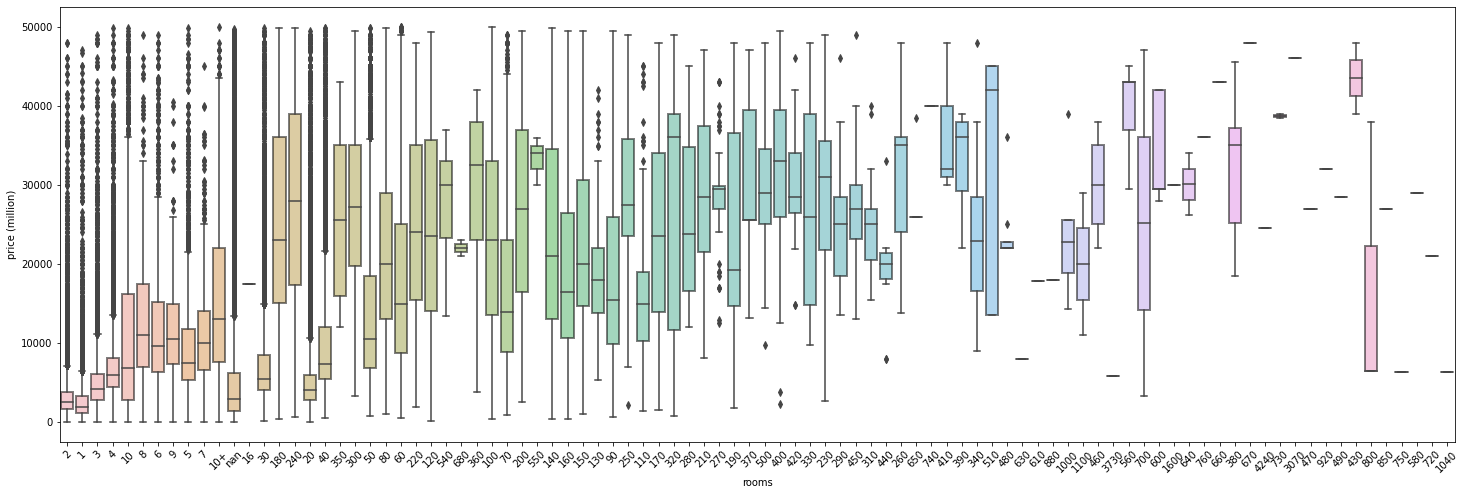

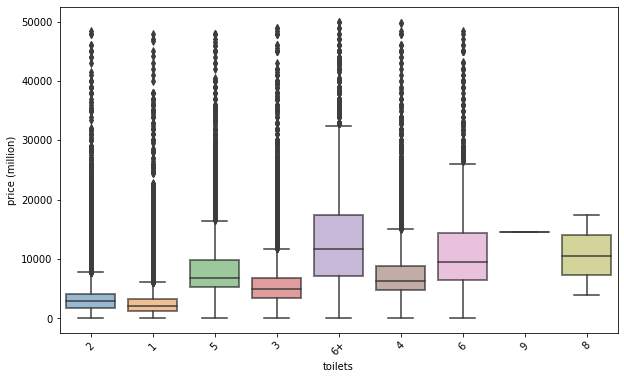

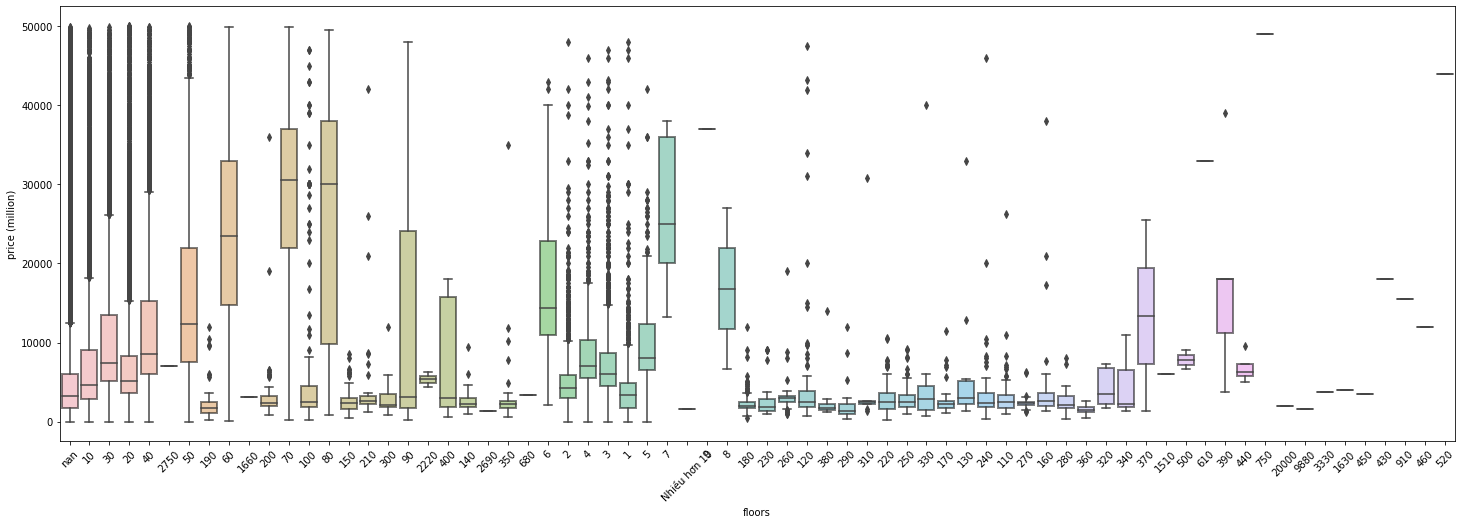

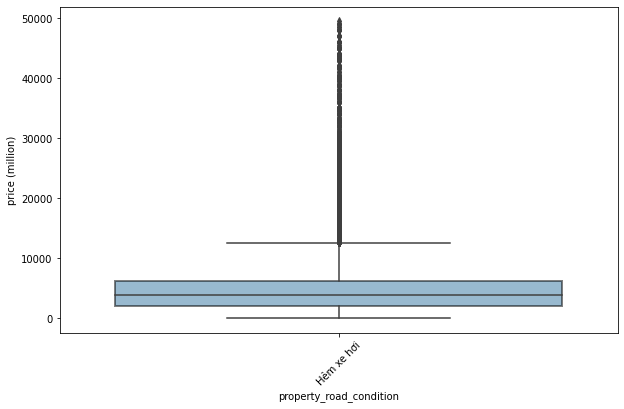

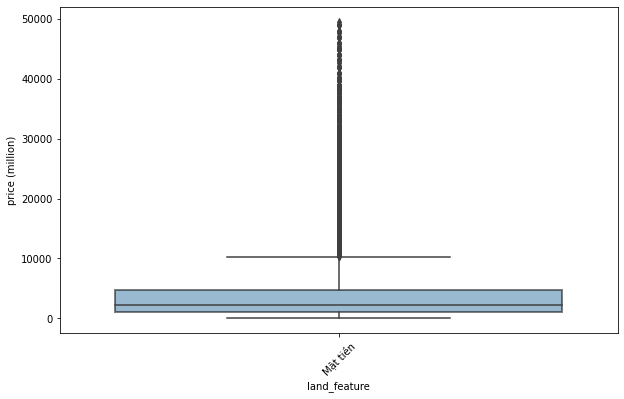

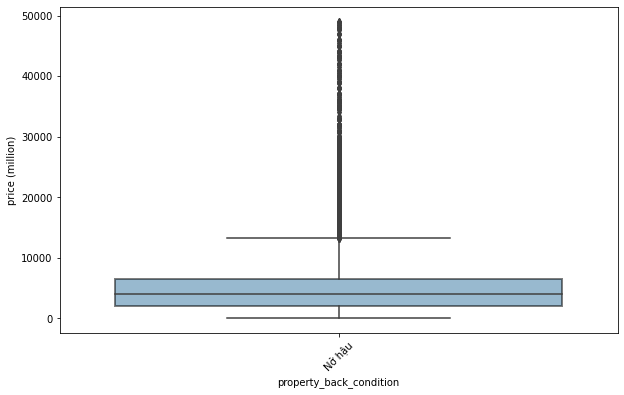

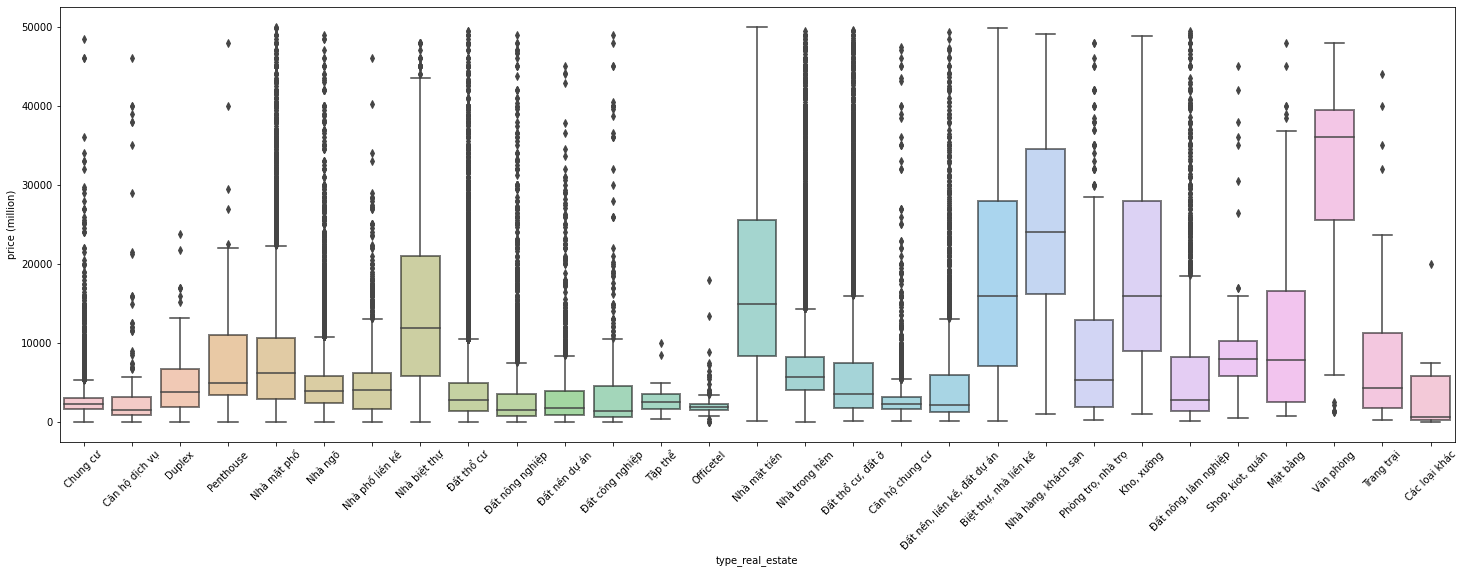

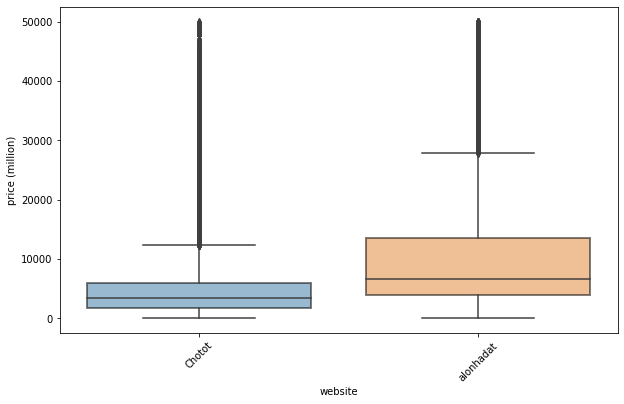

In [710]:
for col in BDS_df.columns:
    if BDS_df[col].dtypes == 'object' and col not in ['list_time', 'ward']:
        if col in ['area', 'type_real_estate', 'rooms', 'floors', 'floornumber']:
            plt.figure(figsize = (25, 8))
        else:
            plt.figure(figsize = (10, 6))
        ax = sns.boxplot(x=col, y='price (million)', data=BDS_df[BDS_df['price (million)'] < 50000])
        plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
        plt.xticks(rotation=45)